In [49]:
#Importing usefull libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
#importing algorithms
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import Imputer
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

%matplotlib inline

In [51]:
#Reading Data
data = pd.read_excel('TRU 2 Hardware and Operating Conditions Matrix 2.3 V5.1.xlsx', 'LinearEngineMap', index_col=False)
data.head()

,N2 Temp. [°C],HEF Temp. [°C],Engine Speed [RPM],N2 Pressure [barg],Break Power [W],BSFC [Wh/kg],FMEP,Unnamed: 7,Excel range,Unnamed: 9
0,15.0,15.0,800.0,30.0,NaN,NaN,NaN,NaN,H15:H31,H15:H31
1,15.0,15.0,800.0,37.5,NaN,NaN,NaN,NaN,H32:H48,H32:H48
2,15.0,15.0,800.0,45.0,NaN,NaN,NaN,NaN,H49:H65,H49:H65
3,15.0,15.0,900.0,30.0,NaN,NaN,NaN,NaN,H66:H82,H66:H82
4,15.0,15.0,900.0,37.5,NaN,NaN,NaN,NaN,H83:H99,H83:H99


In [52]:
#dropping unusable columns
df = data.drop(["Unnamed: 7", "Excel range","Unnamed: 9"], axis=1)
df.head()

,N2 Temp. [°C],HEF Temp. [°C],Engine Speed [RPM],N2 Pressure [barg],Break Power [W],BSFC [Wh/kg],FMEP
0,15.0,15.0,800.0,30.0,NaN,NaN,NaN
1,15.0,15.0,800.0,37.5,NaN,NaN,NaN
2,15.0,15.0,800.0,45.0,NaN,NaN,NaN
3,15.0,15.0,900.0,30.0,NaN,NaN,NaN
4,15.0,15.0,900.0,37.5,NaN,NaN,NaN


## I want to drop also the test points which are not within the  nxn  smaller 4D maps
* HEF T - 15, N2 T -25 and 35
* N2 T - 15, HEF T -25 and 35

In [53]:
#dropping NaN values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 9 to 323
Data columns (total 7 columns):
N2 Temp. [°C]         95 non-null float64
HEF Temp. [°C]        95 non-null float64
Engine Speed [RPM]    95 non-null float64
N2 Pressure [barg]    95 non-null float64
Break Power [W]       95 non-null float64
BSFC [Wh/kg]          95 non-null float64
FMEP                  95 non-null float64
dtypes: float64(7)
memory usage: 5.9 KB


In [54]:
df.columns

Index(['N2 Temp. [°C]', 'HEF Temp. [°C]', 'Engine Speed [RPM]',
       'N2 Pressure [barg]', 'Break Power [W]', 'BSFC [Wh/kg]', 'FMEP'],
      dtype='object')

## df is all the test data

In [55]:
df = df[~((df["N2 Temp. [°C]"] == 15.0) & ((df["HEF Temp. [°C]"] == 25.0) | (df["HEF Temp. [°C]"] == 35.0)))]
df = df[~((df["HEF Temp. [°C]"] == 15.0) & ((df["N2 Temp. [°C]"] == 25.0) | (df["N2 Temp. [°C]"] == 35.0)))]

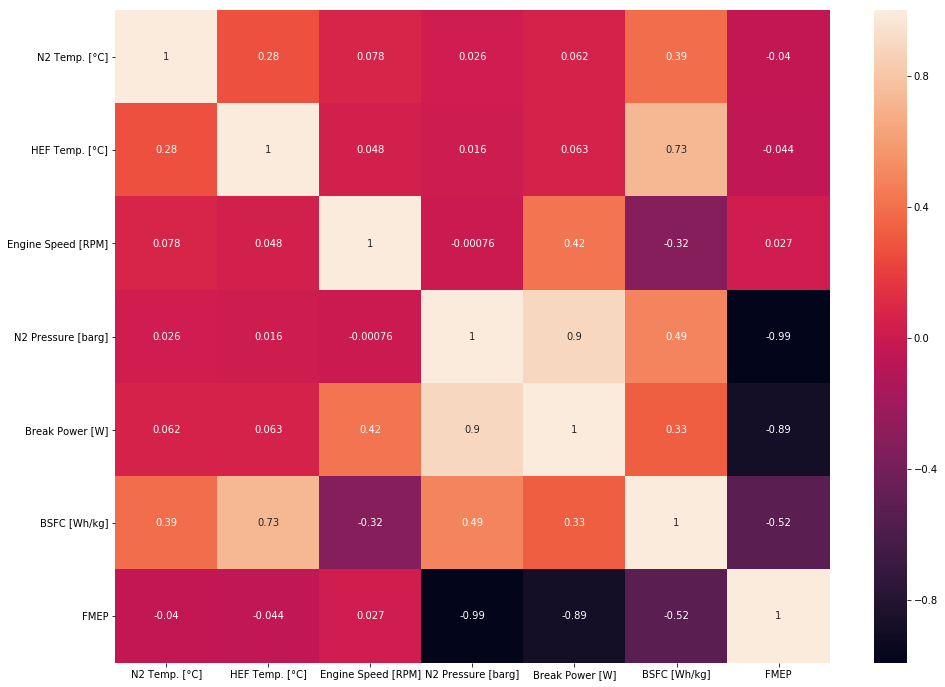

In [70]:
plot = plt.figure(figsize = (16,12))
sns.heatmap(
        df.corr(),
    annot = True
)


## df2 to df5 is 5 off 3x3 for the linear model validation

In [57]:
df2 = df[((df["N2 Temp. [°C]"] == 20.0) & (df["HEF Temp. [°C]"] == 20.0))]
df3 = df[((df["N2 Temp. [°C]"] == 40.0) & (df["HEF Temp. [°C]"] == 20.0))]
df4 = df[((df["N2 Temp. [°C]"] == 30.0) & (df["HEF Temp. [°C]"] == 30.0))]
df5 = df[((df["N2 Temp. [°C]"] == 20.0) & (df["HEF Temp. [°C]"] == 40.0))]
df6 = df[((df["N2 Temp. [°C]"] == 40.0) & (df["HEF Temp. [°C]"] == 40.0))]

In [59]:
df_short1 = [df2, df3, df4, df5, df6]
df_short = pd.concat(df_short1)

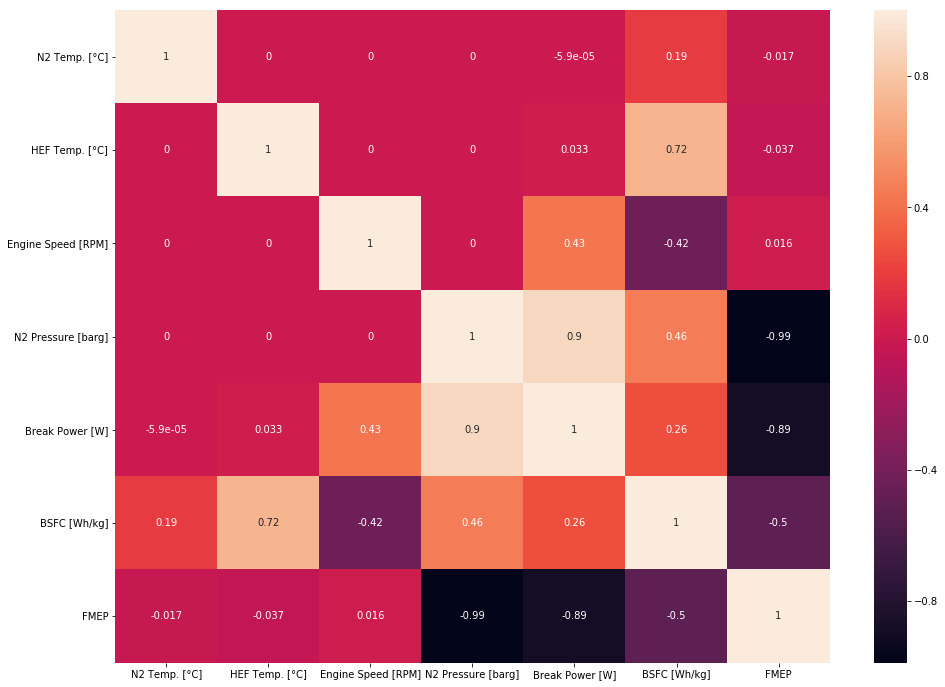

In [71]:
plot = plt.figure(figsize = (16,12))
sns.heatmap(
        df_short.corr(),
    annot = True
)

# Predictions for the first case
## First case - getting the 117 tests and predicting on them

In [61]:
#randomly splitting data for training ang testing
#msk = np.random.rand(len(df)) <=0.7

indices = range(len(df))
train=[indices[i] for i in indices if i%3 != 0]
test=[indices[i] for i in indices if i%3 == 0]
test_data = df.iloc[test]
train_data = df.iloc[train]

In [62]:
train

[1,
 2,
 4,
 5,
 7,
 8,
 10,
 11,
 13,
 14,
 16,
 17,
 19,
 20,
 22,
 23,
 25,
 26,
 28,
 29,
 31,
 32,
 34,
 35,
 37,
 38,
 40,
 41,
 43,
 44,
 46,
 47,
 49,
 50,
 52,
 53,
 55,
 56,
 58,
 59,
 61,
 62,
 64,
 65,
 67,
 68,
 70,
 71,
 73,
 74,
 76]

In [63]:
test_data.head()

,N2 Temp. [°C],HEF Temp. [°C],Engine Speed [RPM],N2 Pressure [barg],Break Power [W],BSFC [Wh/kg],FMEP
9,15.0,20.0,800.0,30.0,3.353333,34.400000,-5.358333
12,15.0,20.0,900.0,30.0,3.800000,33.625000,-5.390000
64,20.0,20.0,800.0,37.5,4.280769,35.792308,-6.990769
67,20.0,20.0,900.0,37.5,4.827143,35.542857,-7.164286
70,20.0,20.0,1000.0,37.5,5.291429,34.586429,-6.760000


In [64]:
#asigning new variables for predictions, dropping the variable which I want to predict
x_train = train_data.drop(["Break Power [W]","FMEP","BSFC [Wh/kg]"], axis = 1)
y_train = train_data["Break Power [W]"]
x_test = test_data.drop(["Break Power [W]","FMEP","BSFC [Wh/kg]"], axis=1)
x_train.shape, y_train.shape,x_test.shape

((51, 4), (51,), (26, 4))

In [65]:
from sklearn.linear_model import LinearRegression 

lr = LinearRegression()
lr.fit(x_train, y_train)
Y_pred = lr.predict(x_test)
difference = 100*(((Y_pred)-test_data["Break Power [W]"])/(Y_pred))

predicted_power = pd.DataFrame({
        "HEF Temp. [°C]": test_data["HEF Temp. [°C]"],
        "Engine Speed [RPM]": test_data["Engine Speed [RPM]"],
        "N2 Pressure [barg]": test_data["N2 Pressure [barg]"],
        "BSFC [Wh/kg]": test_data["BSFC [Wh/kg]"],
        "N2 Temp. [°C]":test_data["N2 Temp. [°C]"],
        "Break Power [W]":test_data["Break Power [W]"],
        "Break Power [W]_pred": Y_pred,
        "Difference": difference
    })

#predicted_power.to_csv('LinearRegression.csv', index=False)
print("The maximum percentage difference is:", difference.max())
print ("The min percentage difference is:", difference.min())
predicted_power.to_csv('Predictions_large.csv')

The maximum percentage difference is: 2.108433775356923
The min percentage difference is: -2.7750313733659033


### Second case when we take only the corner and middle 3x3 test

In [66]:
#randomly splitting data for training ang testing
#msk2 = np.random.rand(len(df_short)) <=0.7

indices2 = range(len(df_short))
train2=[indices2[i] for i in indices2 if i%3 != 0]
test2=[indices2[i] for i in indices2 if i%3 == 0]
test_data2 = df_short.iloc[test2]
train_data2 = df_short.iloc[train2]

In [67]:
train2

[1,
 2,
 4,
 5,
 7,
 8,
 10,
 11,
 13,
 14,
 16,
 17,
 19,
 20,
 22,
 23,
 25,
 26,
 28,
 29,
 31,
 32,
 34,
 35,
 37,
 38,
 40,
 41,
 43,
 44]

In [68]:
#asigning new variables for predictions, dropping the variable which I want to predict
x_train2 = train_data2.drop(["Break Power [W]","FMEP","BSFC [Wh/kg]"], axis = 1)
y_train2 = train_data2["Break Power [W]"]
x_test2 = test_data2.drop(["Break Power [W]","FMEP","BSFC [Wh/kg]"], axis=1)
x_train2.shape, y_train2.shape,x_test2.shape

((30, 4), (30,), (15, 4))

In [69]:
lr2 = LinearRegression()
lr2.fit(x_train2, y_train2)
Y_pred2 = lr2.predict(x_test2)
difference2 = 100*(((Y_pred2)-test_data2["Break Power [W]"])/(Y_pred2))


predicted_power2 = pd.DataFrame({
        "HEF Temp. [°C]": test_data2["HEF Temp. [°C]"],
        "Engine Speed [RPM]": test_data2["Engine Speed [RPM]"],
        "N2 Pressure [barg]": test_data2["N2 Pressure [barg]"],
        "BSFC [Wh/kg]": test_data2["BSFC [Wh/kg]"],
        "N2 Temp. [°C]":test_data2["N2 Temp. [°C]"],
        "Break Power [W]":test_data2["Break Power [W]"],
        "Break Power [W]_pred": Y_pred2,
        "Difference": difference2
    })

#predicted_power.to_csv('LinearRegression.csv', index=False)
print("The maximum percentage difference is:", difference2.max())
print ("The min percentage difference is:", difference2.min())
predicted_power2.to_csv('Predictions_small.csv')

The maximum percentage difference is: 5.193794113922288
The min percentage difference is: -17.065820027178532


In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline

In [80]:
score1 = cross_val_score(lr, x_train, y_train).mean()
score2 = cross_val_score(lr2, x_train2, y_train2).mean()

In [81]:
print (score1)
print (score2)

0.9848531152665071
0.9876578695654058
